In [1]:
import sys
import os
sys.path.append(os.path.abspath('/home/hector/mytopassimulations/MGHsimulations/pythonscripts'))
other_python_path = '/home/hector/mytopassimulations/MGHsimulations/TOPAS_CellsNPs/pythonscripts/'
sys.path.append(os.path.abspath(other_python_path))
import pandas as pd
import numpy as np


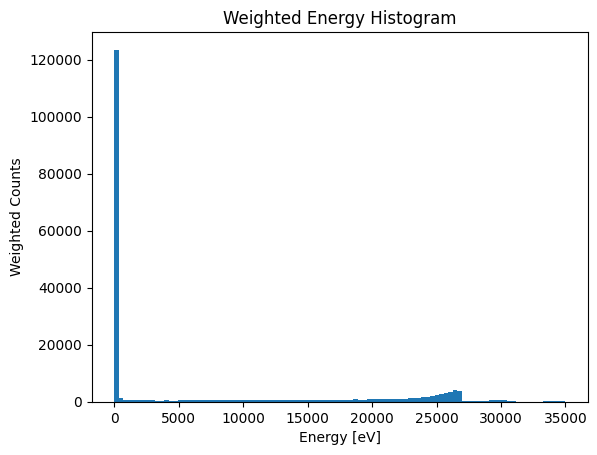

In [2]:
from phsp_manager import generate_weighted_energy_histogram

folder = '/home/hector/mytopassimulations/MGHsimulations/TOPAS_CellsNPs/work/only_results/results_azbatch_med1_smallcell0/'
filename = 'nucleus_PHSP_electrons' # without extension
min_energy = 0      # MeV
max_energy = 0.035  # MeV
bins = 100
particle = 'electrons' # 'electrons', 'gammas'
output_txt = True
show = True
save_path = True
generate_weighted_energy_histogram(folder, filename, bins, min_energy, max_energy, particle, show, save_path, output_txt)

In [3]:
from cell import Cell_class
from nanoparticles import NP_class


# Cylindric cell with spheric nucleus.
cell = Cell_class()
# Values in um
cell.rCell = 6
cell.rNucl = 4.8
cell.height = 10
cell.membraneThickness = 0.01

print(f'Cell volume = {cell.volume_cell()} um')
print(f'Cell nucleus volume = {cell.volume_nucleus()} um')
print(f'Cell cytoplasm volume = {cell.volume_cytoplasm()} um')
print('')


# Au nanoparticle 15 nm diameter
npAu = NP_class()
npAu.rNP = 7.5        # nm
npAu.material = 'goldmat'
npAu.density = 19.3   # g/cm3

print(f'NP volume = {npAu.volume_um3()} um³')
print(f'NP mass = {npAu.mass_mg()} mg')
print(f'NP number in cytoplasm for 1 mg/ml conc = {npAu.number_from_conc_volume(1.0, cell.volume_cytoplasm())}')

Cell volume = 1130.9733552923256 um
Cell nucleus volume = 463.2466863277364 um
Cell cytoplasm volume = 667.7266689645892 um

NP volume = 1.7671458676442582e-06 um³
NP mass = 3.410591524553419e-14 mg
NP number in cytoplasm for 1 mg/ml conc = 19578


In [4]:
# Read simulation results
path_excel = r'/home/hector/mytopassimulations/MGHsimulations/TOPAS_CellsNPs/work/only_results/SimulationResults.xlsx'
sheetName = 'CellsAuNPs'

# Load a specific sheet into a DataFrame by sheet name
df_original = pd.read_excel(path_excel, sheet_name=sheetName)

# Display the first few rows of the DataFrame
df_original.head()

,ID,PC,nanoparticle,medium conc (mg/ml),cell conc (mg/ml),# NPs,uptake var (%),sort NPs,nhist,E_cell (MeV/hist),...,e_phsp/Gy,Dn/Dcyto,Enh (Dcyto),Enh (Dn),Enh (e_phsp/Gy),Enh (e_phsp/hist),NPs_activated,activations/Gy,activation/(Gy*mg/ml),activations/(Gy*NPs)
0,topas-med0-smallcell0,DellWin,AuNP,0.00,0.00,0.0,0,N,1086545316,0.000002,...,578.369730,1.102253,1.000000,1.000000,1.000000,1.000000,0.0,NaN,NaN,NaN
1,topas-med0p05-smallcell0p05,AzureBatch,AuNP,0.05,0.05,978.9,0,Y,1086603764,0.000002,...,578.262864,1.097450,1.009730,1.005330,0.999815,1.009543,585.0,1.699722,33.99444,0.001736
2,topas-med0p2-smallcell0p2,DellWin,AuNP,0.20,0.20,3915.6,0,Y,1086076868,0.000002,...,576.081149,1.085701,1.033392,1.017873,0.996043,1.029303,2300.0,6.532820,32.664102,0.001668
3,topas-med1-smallcell0,AzureBatch,AuNP,1.00,0.00,0.0,0,Y,1086608568,0.000002,...,565.581903,1.077640,1.035135,1.012020,0.977890,1.012248,0.0,0.000000,#DIV/0!,#DIV/0!
4,topas-med1-smallcell0p05,DellWin,AuNP,1.00,0.05,978.9,0,Y,1073828048,0.000002,...,566.293019,1.079148,1.037683,1.015931,0.979119,1.016016,570.0,1.630699,32.613974,0.001666


In [5]:
# Your dictionary with original column names as keys and new names as values
columns_to_select = {
    'ID': 'ID',
    'PC':'PC',
    'medium conc (mg/ml)': 'med_conc',
    'cell conc (mg/ml)': 'cell_conc',
    'uptake var (%)': 'uptake_var_%',
    '# NPs': 'num_nps',
    'sort NPs': 'sort_nps',
    'nhist': 'nhist',
    'E_cell (MeV/hist)': 'E_cell_MeV',
    'dev_Ecell': 'stdev_Ecell',
    'D_n (Gy/hist)': 'Dnucl',
    'stddev (Gy/hist)':'stdev_Dnucl',
    'Auger_e': 'num_auger',
    'e_to_phsp': 'e_to_nucl',
    'NPs_activated': 'num_activations'
    # Add more columns as needed
}

# Create the new DataFrame by selecting and renaming columns
df = df_original[list(columns_to_select.keys())].rename(columns=columns_to_select)
# Replace 'Y' with True and 'N' with False in the 'sotr_nps' column
df['sort_nps'] = df['sort_nps'].replace({'Y': True, 'N': False})

# Display the new DataFrame
df.head()

,ID,PC,med_conc,cell_conc,uptake_var_%,num_nps,sort_nps,nhist,E_cell_MeV,stdev_Ecell,Dnucl,stdev_Dnucl,num_auger,e_to_nucl,num_activations
0,topas-med0-smallcell0,DellWin,0.00,0.00,0,0.0,False,1086545316,0.000002,0.000175,3.457665e-07,0.000037,0,197131,0.0
1,topas-med0p05-smallcell0p05,AzureBatch,0.05,0.05,0,978.9,True,1086603764,0.000002,0.000176,3.476092e-07,0.000037,19888,199023,585.0
2,topas-med0p2-smallcell0p2,DellWin,0.20,0.20,0,3915.6,True,1086076868,0.000002,0.000178,3.519464e-07,0.000037,84636,202820,2300.0
3,topas-med1-smallcell0,AzureBatch,1.00,0.00,0,0.0,True,1086608568,0.000002,0.000177,3.499226e-07,0.000037,0,199557,0.0
4,topas-med1-smallcell0p05,DellWin,1.00,0.05,0,978.9,True,1073828048,0.000002,0.000178,3.512750e-07,0.000037,20231,197944,570.0


In [6]:
volume = cell.volume_cytoplasm()

# Calculate number of nanoparticles from concentration and cytoplasm volume
df['num_nps'] = df['cell_conc'].apply(lambda conc: npAu.number_from_conc_volume(conc, volume))

# Get Dose to cytoplasm from Enery to cell and dose to nucleus
MeV_to_J = 1.0e6*1.602176634e-19
um3_to_m3 = np.power(1.0e-6,3)
d_water_kgm3 = 1000
df['Dcyto'] = (df['E_cell_MeV']*MeV_to_J - df['Dnucl']*cell.volume_nucleus()*um3_to_m3*d_water_kgm3)/(cell.volume_cytoplasm()*um3_to_m3*d_water_kgm3)

# relative uncertainties (k=2)
df['relunc_Dnucl'] = 2*df['stdev_Dnucl']/(np.sqrt(df['nhist'])*df['Dnucl'])
df['relunc_Dcyto'] = 2*df['stdev_Ecell']/(np.sqrt(df['nhist'])*df['E_cell_MeV'])

df['activations_per_GyNP'] = df['num_activations']/(df['Dcyto']*df['nhist']*df['num_nps'])

# Display the new DataFrame
df.head()

,ID,PC,med_conc,cell_conc,uptake_var_%,num_nps,sort_nps,nhist,E_cell_MeV,stdev_Ecell,Dnucl,stdev_Dnucl,num_auger,e_to_nucl,num_activations,Dcyto,relunc_Dnucl,relunc_Dcyto,activations_per_GyNP
0,topas-med0-smallcell0,DellWin,0.00,0.00,0,0,False,1086545316,0.000002,0.000175,3.457665e-07,0.000037,0,197131,0.0,3.136906e-07,0.006441,0.004615,NaN
1,topas-med0p05-smallcell0p05,AzureBatch,0.05,0.05,0,978,True,1086603764,0.000002,0.000176,3.476092e-07,0.000037,19888,199023,585.0,3.167428e-07,0.006437,0.004601,0.001738
2,topas-med0p2-smallcell0p2,DellWin,0.20,0.20,0,3915,True,1086076868,0.000002,0.000178,3.519464e-07,0.000037,84636,202820,2300.0,3.241653e-07,0.006409,0.004571,0.001669
3,topas-med1-smallcell0,AzureBatch,1.00,0.00,0,0,True,1086608568,0.000002,0.000177,3.499226e-07,0.000037,0,199557,0.0,3.247120e-07,0.006392,0.004552,NaN
4,topas-med1-smallcell0p05,DellWin,1.00,0.05,0,978,True,1073828048,0.000002,0.000178,3.512750e-07,0.000037,20231,197944,570.0,3.255115e-07,0.006448,0.004582,0.001667


In [7]:
# Step 1: Identify the baseline Dnucl value where cell_conc is 0.0
baseline_row = df.loc[(df['med_conc'] == 0.0) & (df['cell_conc'] == 0.0)].iloc[0]
columns_to_enhance = ['Dnucl', 'Dcyto']
for col in columns_to_enhance:
    df[f'Enh_{col}'] = df[col] / baseline_row[col]
col = 'e_to_nucl'
df['Enh_e_to_nucl'] = (df[col]/df['nhist'])/(baseline_row[col]/baseline_row['nhist'])
df.head()

,ID,PC,med_conc,cell_conc,uptake_var_%,num_nps,sort_nps,nhist,E_cell_MeV,stdev_Ecell,...,num_auger,e_to_nucl,num_activations,Dcyto,relunc_Dnucl,relunc_Dcyto,activations_per_GyNP,Enh_Dnucl,Enh_Dcyto,Enh_e_to_nucl
0,topas-med0-smallcell0,DellWin,0.00,0.00,0,0,False,1086545316,0.000002,0.000175,...,0,197131,0.0,3.136906e-07,0.006441,0.004615,NaN,1.000000,1.000000,1.000000
1,topas-med0p05-smallcell0p05,AzureBatch,0.05,0.05,0,978,True,1086603764,0.000002,0.000176,...,19888,199023,585.0,3.167428e-07,0.006437,0.004601,0.001738,1.005330,1.009730,1.009543
2,topas-med0p2-smallcell0p2,DellWin,0.20,0.20,0,3915,True,1086076868,0.000002,0.000178,...,84636,202820,2300.0,3.241653e-07,0.006409,0.004571,0.001669,1.017873,1.033392,1.029303
3,topas-med1-smallcell0,AzureBatch,1.00,0.00,0,0,True,1086608568,0.000002,0.000177,...,0,199557,0.0,3.247120e-07,0.006392,0.004552,NaN,1.012020,1.035135,1.012248
4,topas-med1-smallcell0p05,DellWin,1.00,0.05,0,978,True,1073828048,0.000002,0.000178,...,20231,197944,570.0,3.255115e-07,0.006448,0.004582,0.001667,1.015931,1.037683,1.016016


In [8]:
# Enhancements
filt = (df['med_conc']==df['cell_conc'])&(df['PC']!='PISEFM2024')&(df['uptake_var_%']==0.0)
df_filt = df[filt]
print('Dose to nucleus enhancement:')
print(df_filt[['ID','cell_conc', 'Enh_Dnucl', 'relunc_Dnucl']])
print('')

print('Dose to cytoplasm enhancement:')
print(df_filt[['ID','cell_conc', 'Enh_Dcyto', 'relunc_Dcyto']])
print('')

print('Electrons to nucleus enhancement:')
print(df_filt[['ID','cell_conc', 'Enh_e_to_nucl']])
print('')

print('Activations in NPs:')
print(df_filt[['ID','cell_conc', 'num_activations', 'activations_per_GyNP']])
print('')

Dose to nucleus enhancement:
                            ID  cell_conc  Enh_Dnucl  relunc_Dnucl
0        topas-med0-smallcell0       0.00   1.000000      0.006441
1  topas-med0p05-smallcell0p05       0.05   1.005330      0.006437
2    topas-med0p2-smallcell0p2       0.20   1.017873      0.006409
5        topas-med1-smallcell1       1.00   1.067611      0.006260

Dose to cytoplasm enhancement:
                            ID  cell_conc  Enh_Dcyto  relunc_Dcyto
0        topas-med0-smallcell0       0.00   1.000000      0.004615
1  topas-med0p05-smallcell0p05       0.05   1.009730      0.004601
2    topas-med0p2-smallcell0p2       0.20   1.033392      0.004571
5        topas-med1-smallcell1       1.00   1.155768      0.004436

Electrons to nucleus enhancement:
                            ID  cell_conc  Enh_e_to_nucl
0        topas-med0-smallcell0       0.00       1.000000
1  topas-med0p05-smallcell0p05       0.05       1.009543
2    topas-med0p2-smallcell0p2       0.20       1.029303
5     

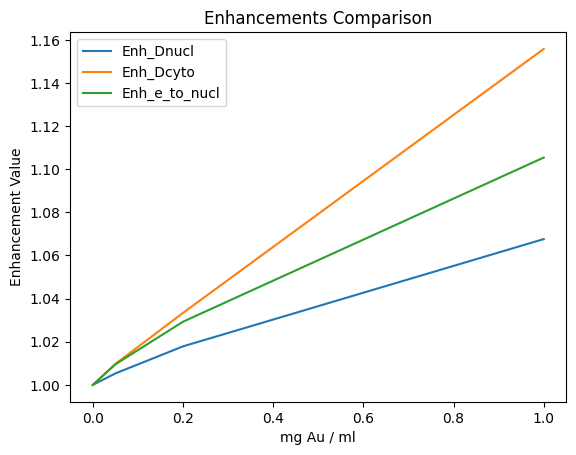

In [9]:
import matplotlib.pyplot as plt

# List of columns that contain the enhancement data
enhancement_columns = ['Enh_Dnucl', 'Enh_Dcyto', 'Enh_e_to_nucl']  # Replace with your actual column names

# Plot each enhancement column
for col in enhancement_columns:
    plt.plot(df_filt['cell_conc'], df_filt[col], label=col)

# Add labels and title
plt.xlabel('mg Au / ml')  # Adjust as needed
plt.ylabel('Enhancement Value')
plt.title('Enhancements Comparison')
plt.legend()  # Add a legend to differentiate the columns
plt.show()

In [10]:
filt = df['ID'].isin(['topas-med1-smallcell0', 'topas-med1-smallcell1'])
df_filt = df[filt]
print('Enhancement due to medium concentration:')
print(df_filt[['med_conc','cell_conc', 'Enh_Dnucl', 'Enh_Dcyto']])
print('')

Enhancement due to medium concentration:
   med_conc  cell_conc  Enh_Dnucl  Enh_Dcyto
3       1.0        0.0   1.012020   1.035135
5       1.0        1.0   1.067611   1.155768



In [11]:
# Generate Energy spectra for nucleus PHSP
from phsp_manager import generate_weighted_energy_histogram

folder = '/home/hector/mytopassimulations/MGHsimulations/TOPAS_CellsNPs/work/only_results/'
filename = 'nucleus_PHSP_electrons' # without extension
min_energy = 0      # MeV
max_energy = 0.035  # MeV
bins = 100
particle = 'electrons' # 'electrons', 'gammas'
output_txt = True
show = False
save_path = True
subdirs = ['results_dellwin_med0_smallcell0',
          'results_azbatch_med0p05_smallcell0p05',
          'results_dellwin_med0p2_smallcell0p2',
          'results_dellwin_med1_smallcell1',
          'results_dellwin_med1_smallcell1-var20']
for sdir in subdirs:
    pth = f'{folder}{sdir}'
    generate_weighted_energy_histogram(pth, filename, bins, min_energy, max_energy, particle, show, save_path, output_txt)

In [12]:
folder = '/home/hector/mytopassimulations/MGHsimulations/TOPAS_CellsNPs/work/only_results/'
filename = 'nucleus_PHSP_electrons' # without extension
sim_results = {'results_dellwin_med0_smallcell0': {'medconc': 0.0,'cellconc':0.0,'df_ESpect': None},
               'results_azbatch_med1_smallcell0': {'medconc': 1.0,'cellconc':0.0,'df_ESpect': None},
               'results_azbatch_med0p05_smallcell0p05': {'medconc': 0.05,'cellconc':0.05,'df_ESpect': None},
               'results_dellwin_med0p2_smallcell0p2': {'medconc': 0.2,'cellconc':0.2,'df_ESpect': None},
               'results_dellwin_med1_smallcell1': {'medconc': 1,'cellconc':1,'df_ESpect': None},
               'results_dellwin_med1_smallcell1-var20': {'medconc': 1,'cellconc':1,'df_ESpect': None}}
for sdir in sim_results.keys():
    pth = f'{folder}{sdir}/EnergyHistogram_nucleus_PHSP_electrons_electrons.txt'
    sim_results[sdir]['df_ESpect'] = pd.read_csv(pth, delim_whitespace=True, comment='#', header=None, names=['Energy[MeV]', 'Weighted_Counts', 'Uncertainty'])

ref = 'results_dellwin_med0_smallcell0'
for sdir in sim_results.keys():
    sim_results[sdir]['df_ESpect']['el_enh'] = sim_results[sdir]['df_ESpect']['Weighted_Counts']/sim_results[ref]['df_ESpect']['Weighted_Counts']

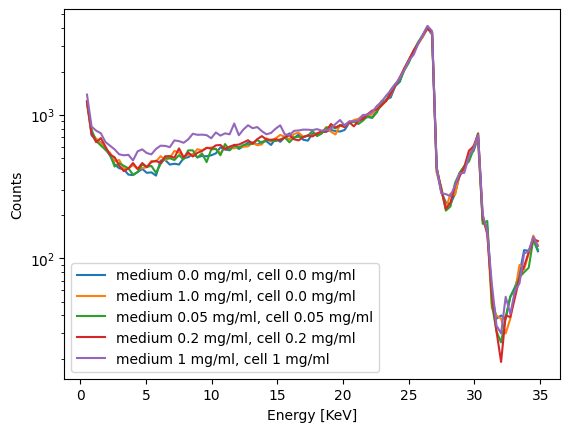

In [13]:
for sdir in sim_results.keys():
    df=sim_results[sdir]['df_ESpect'].iloc[1:]
    medconc=sim_results[sdir]['medconc']
    cellconc=sim_results[sdir]['cellconc']
    if 'var20' not in sdir:
        #plt.errorbar(df['Energy[MeV]']*1000, df['Weighted_Counts'], yerr=df['Uncertainty'], fmt='o', ecolor='red', markersize=1,capsize=3, label=f'medium {medconc}mg/ml, cell {cellconc}mg/ml')
        plt.plot(df['Energy[MeV]']*1000, df['Weighted_Counts'], label=f'medium {medconc} mg/ml, cell {cellconc} mg/ml')
# Add labels and title
plt.xlabel('Energy [KeV]')
plt.ylabel('Counts')
plt.legend()
plt.yscale('log')

# Show the plot
plt.show()

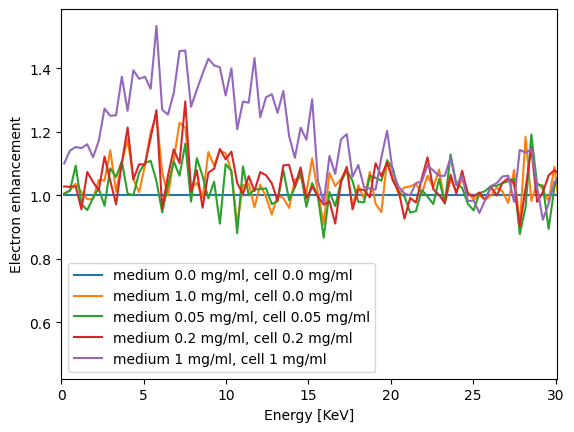

In [14]:
for sdir in sim_results.keys():
    df=sim_results[sdir]['df_ESpect']
    medconc=sim_results[sdir]['medconc']
    cellconc=sim_results[sdir]['cellconc']
    if 'var20' not in sdir:
        #plt.errorbar(df['Energy[MeV]']*1000, df['Weighted_Counts'], yerr=df['Uncertainty'], fmt='o', ecolor='red', markersize=1,capsize=3, label=f'medium {medconc}mg/ml, cell {cellconc}mg/ml')
        plt.plot(df['Energy[MeV]']*1000, df['el_enh'], label=f'medium {medconc} mg/ml, cell {cellconc} mg/ml')
# Add labels and title
plt.xlabel('Energy [KeV]')
plt.xlim([0,30.1])
plt.ylabel('Electron enhancement')
plt.legend()

# Show the plot
plt.show()

In [81]:
import pandas as pd
import numpy as np

def read_topas_energy_binned_file(file_path):
    """
    Reads a TOPAS dose scoring file and returns a DataFrame including special bins.

    Args:
        file_path (str): Path to the TOPAS dose scoring CSV file.

    Returns:
        pd.DataFrame: DataFrame containing the binned dose statistics with bin centers,
                      including underflow, overflow, and no incident track bins.
    """
    binning_info = {}
    statistics_labels = []

    with open(file_path, 'r') as file:
        lines = file.readlines()

        # Parse the metadata (comment lines starting with #)
        for line in lines:
            if line.startswith('#'):
                if 'Binned by' in line:
                    parts = line.split(' bins of ')
                    binning_info['n_bins'] = int(parts[0].split(' ')[-1])
                    binning_info['bin_width'] = float(parts[1].split(' ')[0])
                    parts = line.split(' from ')
                    binning_info['bin_start'] = float(parts[1].split(' ')[0])
                    parts = line.split(' to ')
                    binning_info['bin_end'] = float(parts[1].split(' ')[0])
                elif 'DoseToMedium' in line:
                    statistics_labels = [label.strip() for label in line.split(':')[1].split()]
            else:
                # The data starts after the metadata
                data_line = line.strip()  # Extract the data row
                break

    # Parse the data row into a list of floats
    data_values = np.array(data_line.split(','), dtype=float)

    # Reshape the data into rows for each bin
    n_columns = len(statistics_labels)
    data = data_values.reshape((-1, n_columns))

    # Create a DataFrame and assign column names
    df = pd.DataFrame(data, columns=statistics_labels)
    print(len(df))
    # Calculate bin centers for all bins including special bins
    bin_centers = np.arange(
            binning_info['bin_start'] - binning_info['bin_width'] / 2,
            binning_info['bin_start'] + (len(df)-1) * binning_info['bin_width'],
            binning_info['bin_width'])
    print(len(bin_centers))
    print(binning_info)
    # Ensure bin_centers length matches the DataFrame
    if len(bin_centers) != len(df):
        raise ValueError(
            f"Mismatch: bin_centers length ({len(bin_centers)}) != DataFrame length ({len(df)})"
        )

    # Insert bin centers as the first column
    df.insert(0, 'Bin Center (MeV)', bin_centers)
    len(df)

    return df


103
103
{'n_bins': 100, 'bin_width': 0.00035, 'bin_start': 0.0, 'bin_end': 0.035}
103
103
{'n_bins': 100, 'bin_width': 0.00035, 'bin_start': 0.0, 'bin_end': 0.035}


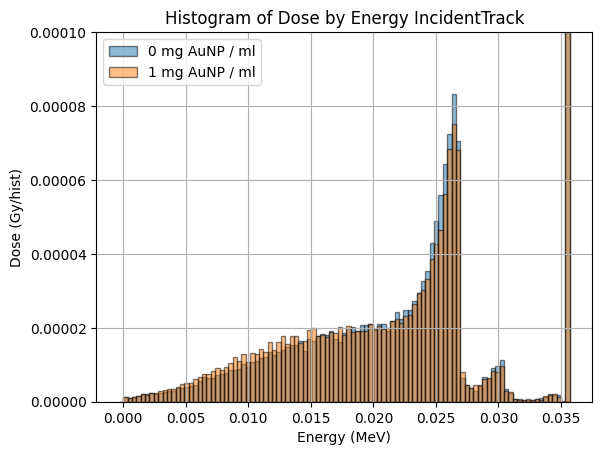

In [117]:
# Read Energy binned outputs

folder = '/home/hector/mytopassimulations/MGHsimulations/tests/dose_to_nucleus/med0_cell0/'
filename = 'DoseToNucleus_IncidentTrack.csv' # without extension
# Path to the CSV file
file_path = f'{folder}{filename}'
# Call the function to read the file
df0 = read_topas_energy_binned_file(file_path)

folder = '/home/hector/mytopassimulations/MGHsimulations/tests/dose_to_nucleus/med1_cell1/'
filename = 'DoseToNucleus_IncidentTrack.csv' # without extension
# Path to the CSV file
file_path = f'{folder}{filename}'
# Call the function to read the file
df1 = read_topas_energy_binned_file(file_path)

plt.bar(
    df0['Bin Center (MeV)'],
    df0['Mean'],
    width=(df0['Bin Center (MeV)'].iloc[2] - df0['Bin Center (MeV)'].iloc[1]),
    align='center',
    edgecolor='k',
    alpha=0.5,  # Set transparency
    label='0 mg AuNP / ml'
)

plt.bar(
    df1['Bin Center (MeV)'],
    df1['Mean'],
    width=(df1['Bin Center (MeV)'].iloc[2] - df1['Bin Center (MeV)'].iloc[1]),
    align='center',
    edgecolor='k',
    alpha=0.5,  # Set transparency
    label='1 mg AuNP / ml'
)

plt.xlabel('Energy (MeV)')
#plt.xlim([0,0.035])
plt.ylim([0,1e-4])
plt.ylabel('Dose (Gy/hist)')
plt.title('Histogram of Dose by Energy IncidentTrack')
plt.grid(True)
plt.legend()
#plt.yscale("log") 
plt.show()

102
102
{'n_bins': 100, 'bin_width': 1e-06, 'bin_start': 0.0, 'bin_end': 0.0001}
102
102
{'n_bins': 100, 'bin_width': 1e-06, 'bin_start': 0.0, 'bin_end': 0.0001}


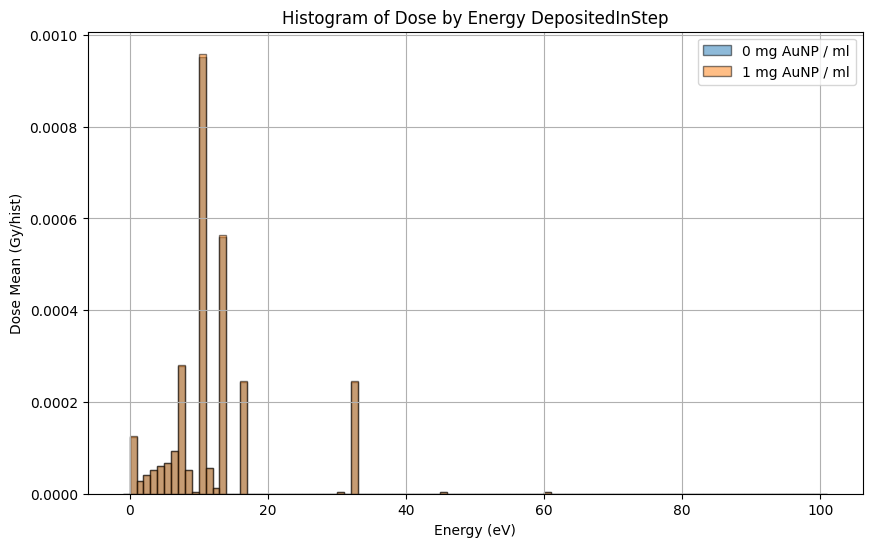

In [118]:
# Read Energy binned outputs

folder = '/home/hector/mytopassimulations/MGHsimulations/tests/dose_to_nucleus/med0_cell0/'
filename = 'DoseToNucleus_DepositedInStep.csv' # without extension
# Path to the CSV file
file_path = f'{folder}{filename}'
# Call the function to read the file
df0 = read_topas_energy_binned_file(file_path)

folder = '/home/hector/mytopassimulations/MGHsimulations/tests/dose_to_nucleus/med1_cell1/'
filename = 'DoseToNucleus_DepositedInStep.csv' # without extension
# Path to the CSV file
file_path = f'{folder}{filename}'
# Call the function to read the file
df1 = read_topas_energy_binned_file(file_path)

plt.figure(figsize=(10, 6))
plt.bar(
    1e6*df0['Bin Center (MeV)'],
    df0['Mean'],
    width=1e6*(df0['Bin Center (MeV)'].iloc[2] - df0['Bin Center (MeV)'].iloc[1]),
    align='center',
    edgecolor='k',
    alpha=0.5,  # Set transparency
    label='0 mg AuNP / ml'
)

plt.bar(
    1e6*df1['Bin Center (MeV)'],
    df1['Mean'],
    width=1e6*(df1['Bin Center (MeV)'].iloc[2] - df1['Bin Center (MeV)'].iloc[1]),
    align='center',
    edgecolor='k',
    alpha=0.5,  # Set transparency
    label='1 mg AuNP / ml'
)
plt.xlabel('Energy (eV)')
plt.ylabel('Dose Mean (Gy/hist)')
plt.title('Histogram of Dose by Energy DepositedInStep')
plt.legend()
plt.grid(True)
#plt.yscale("log") 
plt.show()